In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from wordcloud import WordCloud
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

In [55]:
import nltk
from nltk import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [30]:
train = pd.read_csv('/content/twitter_training.csv',header=None)
val = pd.read_csv('/content/twitter_validation.csv',header=None)

In [31]:
train.columns = ['id','information','label','text']
train.head()

,id,information,label,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [32]:
val.columns=['id','information','label','text']
val.head()

,id,information,label,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [33]:
train['lower']=train.text.str.lower()


In [34]:
train['lower']=[str(data) for data in train.lower]

In [35]:
train['lower'] = train.lower.apply(lambda x: re.sub('[^A-Za-z0-9]+',' ', x))

In [36]:
val['lower']=val.text.str.lower()
val['lower'] = [str(data) for data in val.lower]
val['lower'] = val.lower.apply(lambda x: re.sub('[^A-Za-z0-9]+',' ', x))

In [37]:
train.head()

,id,information,label,text,lower
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...


In [38]:
val.head()

,id,information,label,text,lower
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...,i mentioned on facebook that i was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,bbc news amazon boss jeff bezos rejects claims...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...,microsoft why do i pay for word when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,...",csgo matchmaking is so full of closet hacking ...
4,4433,Google,Neutral,Now the President is slapping Americans in the...,now the president is slapping americans in the...


# Plotting Features

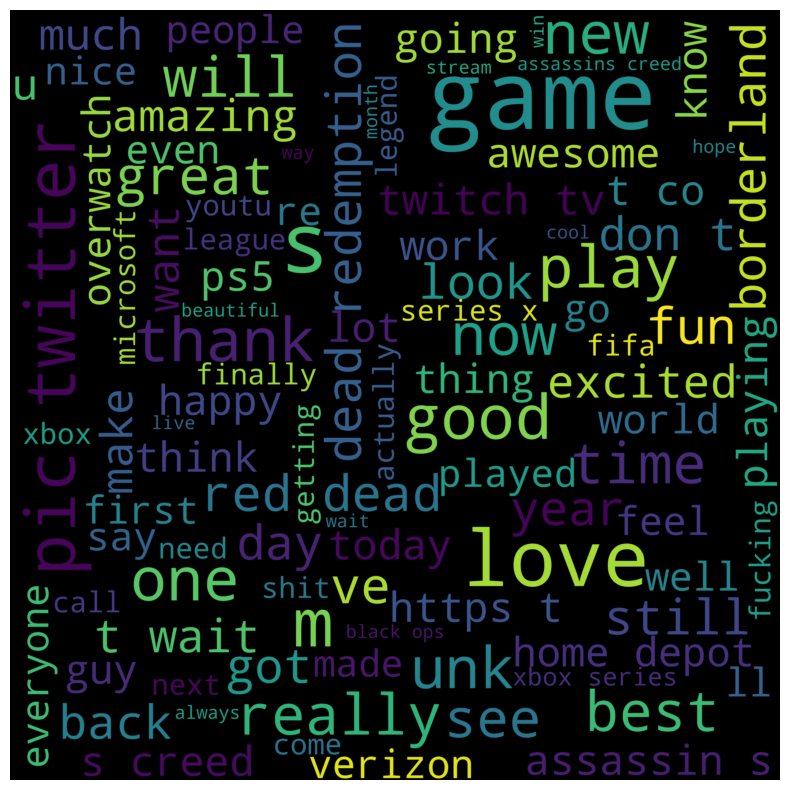

In [39]:
word_cloud_text = ''.join(train[train['label']=='Positive'].lower)

wordcloud = WordCloud(
    max_font_size = 100,
    max_words = 100,
    background_color='black',
    scale = 10,
    width=800,
    height = 800
).generate(word_cloud_text)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

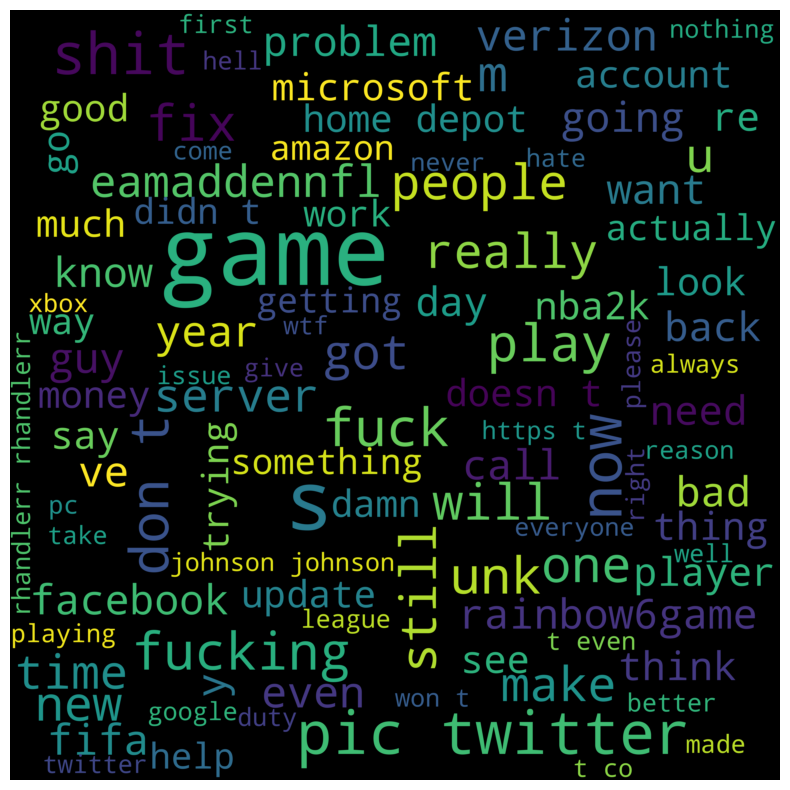

In [40]:
word_cloud_neg=''.join(train[train['label']=='Negative'].lower)

wordcloud = WordCloud(
    max_font_size=100,
    max_words = 100,
    background_color='black',
    width = 800,
    height = 800,
    scale = 10
).generate(word_cloud_neg)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

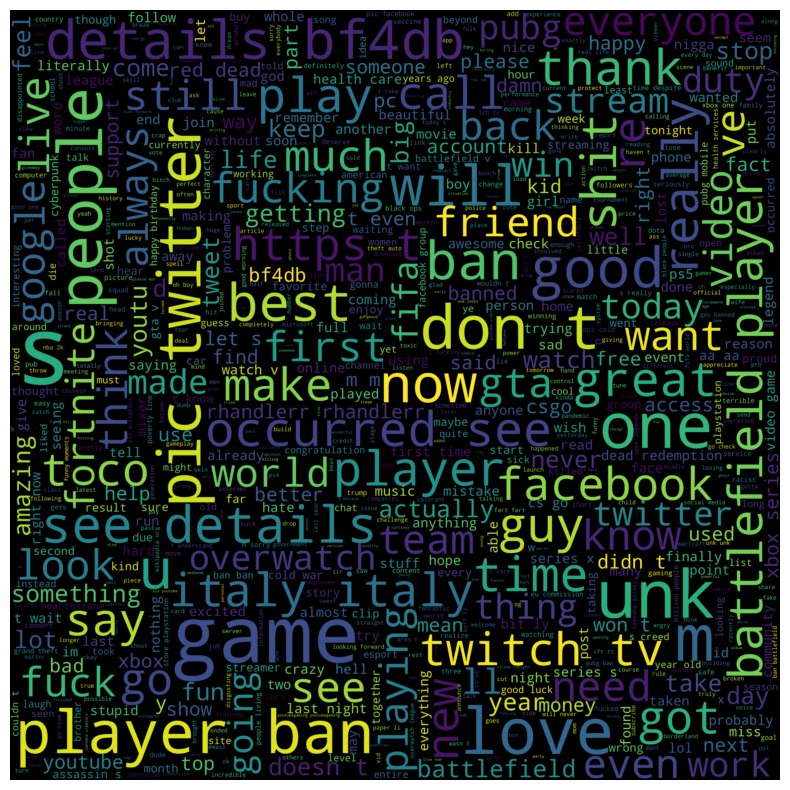

In [41]:
word_cloud_irr = ''.join(train[train['label']=='Irrelevant'].lower)

wordcloud= WordCloud(
    max_font_size = 100,
    max_words = 800,
    scale=10,
    width=800,
    height = 800,
    background_color='black'
).generate(word_cloud_irr)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

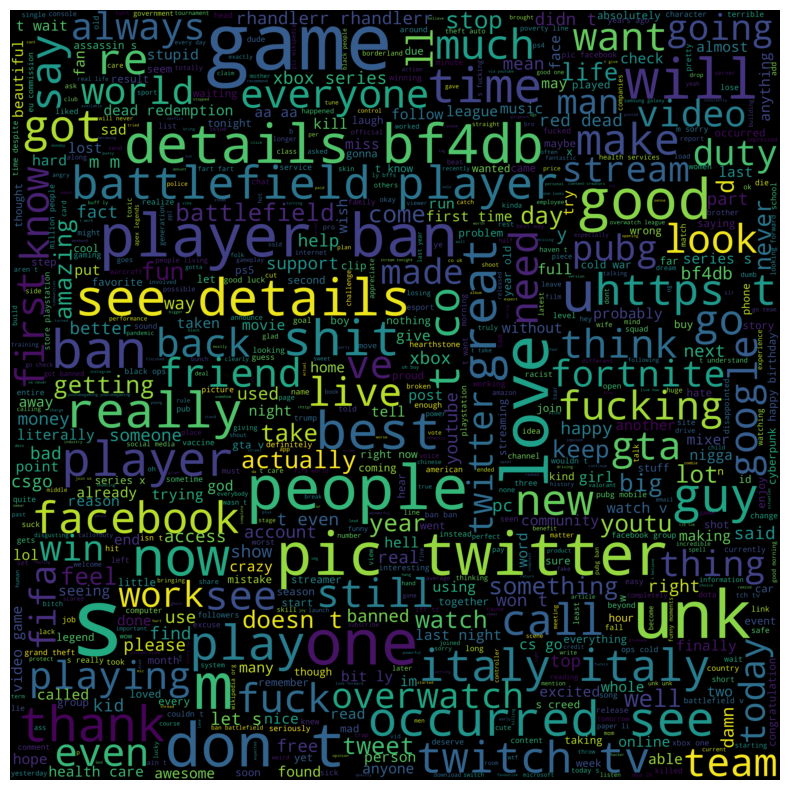

In [42]:
word_cloud_neutral = ''.join(train[train['label']=='Neutral'].lower)

wordcloud= WordCloud(
    max_font_size = 100,
    max_words = 800,
    scale=10,
    width=800,
    height = 800,
    background_color='black'
).generate(word_cloud_irr)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [44]:
#count information per category

plot1 = train.groupby(by=['information','label']).count().reset_index()
plot1.head()

,information,label,id,text,lower
0,Amazon,Irrelevant,192,186,192
1,Amazon,Negative,576,575,576
2,Amazon,Neutral,1236,1207,1236
3,Amazon,Positive,312,308,312
4,ApexLegends,Irrelevant,192,192,192


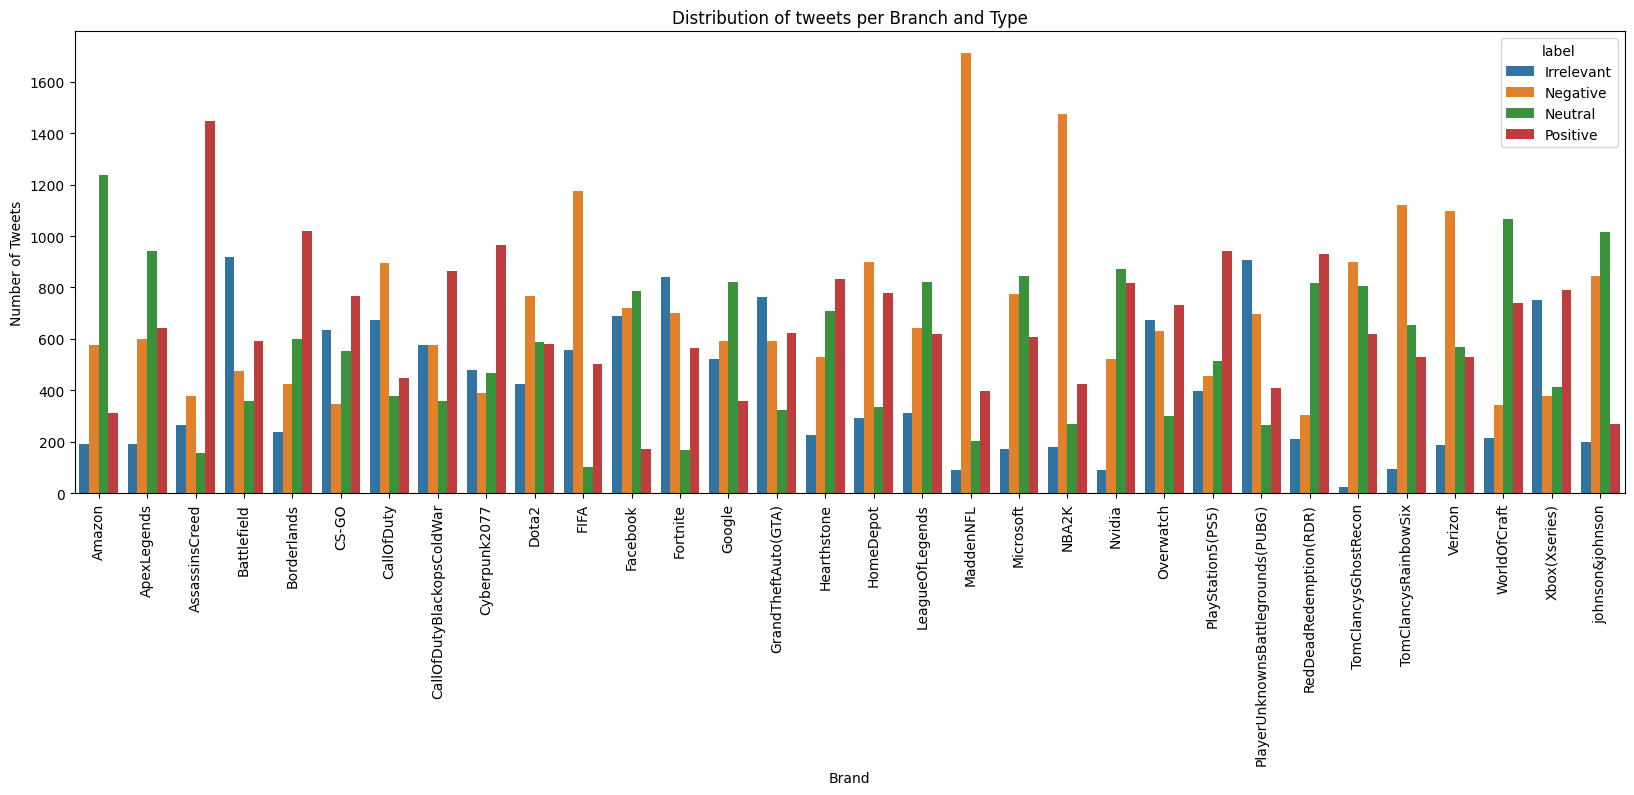

In [49]:
plt.figure(figsize=(20,6))
sns.barplot(data=plot1, x='information',y='id',hue='label')
plt.xticks(rotation=90)
plt.xlabel('Brand')
plt.ylabel('Number of Tweets')
plt.title('Distribution of tweets per Branch and Type')
plt.show()


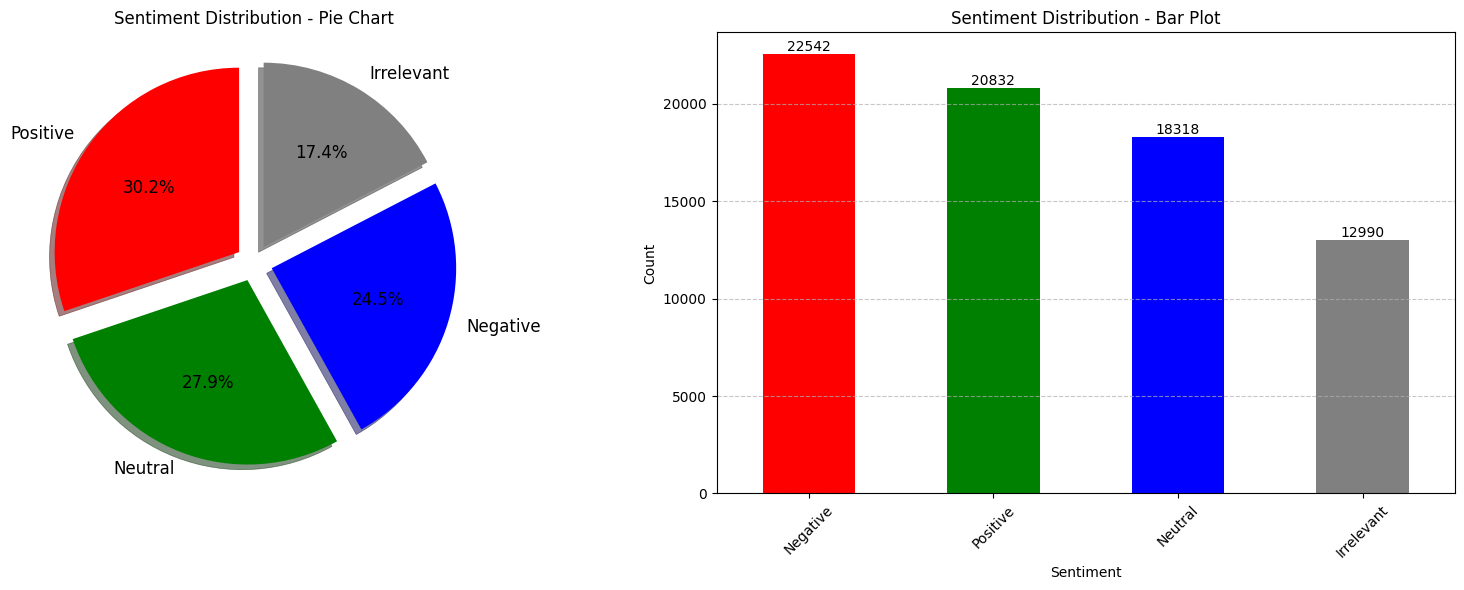

In [169]:
# Define custom colors
colors = ['red', 'green', 'blue', 'gray']

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plotting pie chart for sentiment distribution with custom colors
axs[0].pie(train['label'].value_counts(), labels=train['label'].unique(), autopct='%1.1f%%',
            startangle=90, wedgeprops={'linewidth': 0.5}, textprops={'fontsize': 12},
            explode=[0.1, 0.1, 0.1, 0.1], colors=colors, shadow=True)
axs[0].set_title('Sentiment Distribution - Pie Chart')

# Plotting bar plot for sentiment distribution
axs[1] = train['label'].value_counts().plot(kind='bar', color=colors, ax=axs[1])
axs[1].set_title('Sentiment Distribution - Bar Plot')
axs[1].set_xlabel('Sentiment')
axs[1].set_ylabel('Count')
axs[1].tick_params(axis='x', rotation=45)
axs[1].grid(axis='y', linestyle='--', alpha=0.7)

# Add text on top of each bar in the bar plot
for p in axs[1].patches:
    axs[1].annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

# Text Analysis

In [57]:
#text splitting
tokens_text = [word_tokenize(str(word)) for word in train.lower]

In [59]:
#Unique word counter
tokens_counter= [item for sublist in tokens_text for item in sublist]
print('Number of tokens: ', len(set(tokens_counter)))

Number of tokens:  30436


In [63]:
tokens_text[1]

['i',
 'am',
 'coming',
 'to',
 'the',
 'borders',
 'and',
 'i',
 'will',
 'kill',
 'you',
 'all']

In [66]:
stopwords_nltk = nltk.corpus.stopwords
stop_words = stopwords_nltk.words('english')
stop_words[:5]

['i', 'me', 'my', 'myself', 'we']

# Logistic Regression model

In [75]:
#initial Bag of Words

bow_counts = CountVectorizer(
    tokenizer = word_tokenize,
    stop_words = stop_words,
    ngram_range=(1,1)
)

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [73]:
train_reviews, test_reviews = train_test_split(train,test_size=0.2, random_state = 0)

In [77]:
# encoding related to train dataset
X_train_bow = bow_counts.fit_transform(train_reviews.lower)
X_test_bow = bow_counts.transform(test_reviews.lower)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(


In [78]:
X_test_bow

<14937x28993 sparse matrix of type '<class 'numpy.int64'>'
	with 161222 stored elements in Compressed Sparse Row format>

In [79]:

y_train_bow = train_reviews['label']
y_test_bow = test_reviews['label']

In [80]:
#total of registers per category
y_test_bow.value_counts() / y_test_bow.shape[0]

label
Negative      0.299190
Positive      0.282252
Neutral       0.245632
Irrelevant    0.172926
Name: count, dtype: float64

In [83]:
#Logistic Regression
model1 = LogisticRegression(C=1, solver = 'liblinear', max_iter= 200)
model1.fit(X_train_bow,y_train_bow)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LogisticRegression(C=1, max_iter=200, solver='liblinear')

In [86]:
test_pred = model1.predict(X_test_bow)
print('Accuracy: ', accuracy_score(y_test_bow, test_pred))

Accuracy:  0.8150900448550579


In [87]:
val.head()

,id,information,label,text,lower
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...,i mentioned on facebook that i was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,bbc news amazon boss jeff bezos rejects claims...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...,microsoft why do i pay for word when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,...",csgo matchmaking is so full of closet hacking ...
4,4433,Google,Neutral,Now the President is slapping Americans in the...,now the president is slapping americans in the...


In [89]:
#validation data

X_val_bow = bow_counts.transform(val.lower)
y_val_bow = val['label']

In [92]:
X_val_bow

<1000x28993 sparse matrix of type '<class 'numpy.int64'>'
	with 12913 stored elements in Compressed Sparse Row format>

In [93]:
val_pred = model1.predict(X_val_bow)
print('Accuracy: ', accuracy_score(y_val_bow, val_pred))

Accuracy:  0.917


## n-gram of 4 words

In [94]:
bow_counts = CountVectorizer(
    tokenizer = word_tokenize,
    ngram_range=(1,4)
)

In [96]:
#Data labeling
X_train_bow = bow_counts.fit_transform(train_reviews.lower)
X_test_bow = bow_counts.transform(test_reviews.lower)
X_val_bow = bow_counts.transform(val.lower)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
model2 = LogisticRegression(C=0.9, solver="liblinear",max_iter=1500)
model2.fit(X_train_bow, y_train_bow)

#prediction
test_pred_2 = model2.predict(X_test_bow)
print('Accuracy: ', accuracy_score(y_test_bow, test_pred_2))

In [101]:
y_val_bow = val['label']
val_pred_2 = model2.predict(X_val_bow)
print('Accuracy: ', accuracy_score(y_val_bow, val_pred_2))

Accuracy:  0.986


# XGBoost Approach

In [103]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

In [104]:
le = LabelEncoder()
y_train_bow_num = le.fit_transform(y_train_bow)
y_test_bow_num = le.transform(y_test_bow)
y_val_bow_num = le.transform(y_val_bow)

In [105]:
%%time

XGB = XGBClassifier(objective = 'multi:softmax', n_estimators = 1000, colsample_bytree=0.6, subsample = 0.6)
XGB.fit(X_train_bow, y_train_bow_num)

#prediction
test_pred_2 = XGB.predict(X_test_bow)
print('Accuracy: ', accuracy_score(y_test_bow_num, test_pred_2))

Accuracy:  0.8494342906875544
CPU times: user 2h 19min 55s, sys: 10.5 s, total: 2h 20min 5s
Wall time: 1h 26min 1s


In [108]:
y_val_bow = val['label']
Val_pred_2 = XGB.predict(X_val_bow)
print("Accuracy: ", accuracy_score(y_val_bow_num, Val_pred_2) * 100)

Accuracy:  96.0


In [109]:
test_pred_N = XGB.predict(X_train_bow)
print("Accuracy: ", accuracy_score(y_train_bow_num, test_pred_N) * 100)

Accuracy:  93.54590342288057


# Making prediction on user Text

In [111]:
import joblib

In [112]:
joblib.dump(XGB, 'xgb_model.pkl')
joblib.dump(bow_counts, 'vectorizer.pkl')

['vectorizer.pkl']

In [131]:
joblib.dump(le,'label_encoder.pkl')

['label_encoder.pkl']

In [113]:
model = joblib.load('/content/xgb_model.pkl')
vectorizer = joblib.load('/content/vectorizer.pkl')

In [132]:
label_encoder = joblib.load('/content/label_encoder.pkl')

In [137]:
def predict_sentiment(text,model,vectorizer,encoder):
  text_vec = vectorizer.transform([text])
  prediction = model.predict(text_vec)
  decoded_pred = label_encoder.inverse_transform(prediction)
  return decoded_pred[0]

In [163]:
text = 'i love this product'
predict_sentiment(text,model,vectorizer,label_encoder)

'Positive'

In [164]:
text2 = "I'm really disappointed with the latest Borderlands update. It ruined the game for me."
predict_sentiment(text2, model,vectorizer,label_encoder)

'Negative'

In [165]:
text3 = "Haven't played Borderlands in a while. Need to catch up on the latest updates."
predict_sentiment(text3,model,vectorizer,label_encoder)

'Neutral'

In [166]:
text4 = "Lets connect...."
predict_sentiment(text4,model,vectorizer,label_encoder)

'Positive'